# Loading the Reuters dataset

In [1]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

Using TensorFlow backend.


In [3]:
print(len(train_data))
print(len(test_data))

8982
2246


In [4]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

# Decoding newswires back to text

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])

In [6]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [7]:
train_labels[0]

3

# Encoding the data¶ or preparing the data 

In [8]:
# converrt data into numpy array
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
# yaha per binary classification ka problem ha yaha number of classes 46 ha tu yaha hum isko onehot encode karaga
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [ ]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)
 #same one hot encoding wala kam 

# Setting aside a validation set

In [10]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [11]:
len(x_train)

8982

# Model

In [12]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax')) #46 classes ha isliye 46 ha 

In [14]:
len(train_labels)

8982

# compile

In [15]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

# Training

In [17]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))


Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 360us/step - loss: 2.5808 - accuracy: 0.5283 - val_loss: 1.7139 - val_accuracy: 0.6410
Epoch 2/20
7982/7982 [==============================] - 2s 210us/step - loss: 1.3832 - accuracy: 0.7127 - val_loss: 1.2721 - val_accuracy: 0.7290
Epoch 3/20
7982/7982 [==============================] - 2s 206us/step - loss: 1.0333 - accuracy: 0.7798 - val_loss: 1.1222 - val_accuracy: 0.7610
Epoch 4/20
7982/7982 [==============================] - 2s 229us/step - loss: 0.8125 - accuracy: 0.8302 - val_loss: 1.0280 - val_accuracy: 0.7860
Epoch 5/20
7982/7982 [==============================] - 2s 215us/step - loss: 0.6556 - accuracy: 0.8623 - val_loss: 0.9587 - val_accuracy: 0.8080
Epoch 6/20
7982/7982 [==============================] - 2s 311us/step - loss: 0.5304 - accuracy: 0.8900 - val_loss: 0.9183 - val_accuracy: 0.8100
Epoch 7/20
7982/7982 [==============================] - 3s 349us/step - los

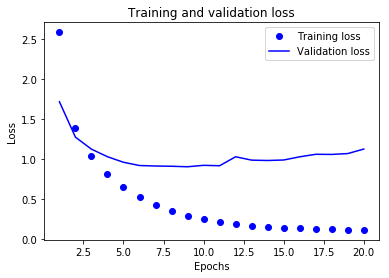

In [19]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

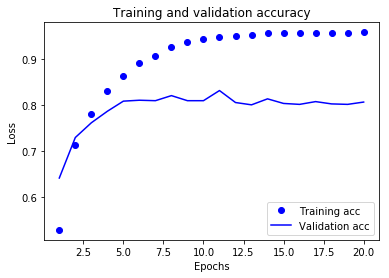

In [20]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [21]:
predictions = model.predict(x_test)

In [22]:
predictions[0]


array([4.18197999e-07, 1.09383973e-06, 7.87838239e-09, 8.79437327e-01,
       1.19767830e-01, 2.85122176e-10, 3.95913190e-07, 9.90685839e-06,
       8.34602833e-05, 6.46573790e-06, 3.99374176e-06, 2.06373021e-04,
       7.47011271e-08, 1.00802736e-05, 1.89629262e-07, 9.70339897e-08,
       2.18607966e-05, 7.32208321e-07, 1.32521009e-07, 1.74837944e-04,
       1.10508096e-04, 4.21096702e-05, 4.53793589e-08, 9.10955180e-07,
       5.37653744e-09, 6.11457494e-07, 1.28958607e-06, 2.42807392e-08,
       2.05756714e-06, 1.82988551e-05, 1.48140598e-05, 2.50442440e-07,
       1.65378435e-06, 2.54451731e-08, 6.98478232e-07, 3.86220734e-07,
       1.74984652e-05, 6.81160202e-07, 1.99074620e-07, 6.04141969e-05,
       1.21560402e-06, 4.29128193e-07, 5.60272362e-09, 1.06684013e-08,
       8.05759792e-10, 5.12243219e-07], dtype=float32)

In [23]:
predictions[0].shape #ya probablity aye gi 46 classes ki

(46,)

In [24]:
predictions[0].sum() #jb probablity ko sumn karaga tu 1 aye ga

0.9999999

In [25]:
predictions.shape #test data 2246 tha aur 46 classes ha 
#yani har test ka nazdik 46 prediction ha  ka kis class sa kitna belong karta ha 

(2246, 46)

In [27]:
predictions[0].argmax() #yani 3 ki probability sb sa zada ha

3